# Report

## 1 - HyperParameters

#### Neural Networks Architecture :
-->All neural networks are define like this :


action_size = 4 <br>
state_size = 37

In [ ]:
class DQN(nn.Module):
    def __init__(self, state_size, action_size, seed, size_1=64, size_2=64):
        super(DQN, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.state_size = state_size
        self.action_size = action_size
        self.lin1 = nn.Linear(self.state_size, size_1)
        self.lin2 = nn.Linear(size_1, size_2)
        self.lin3 = nn.Linear(size_2, self.action_size)
        
    def forward(self, input_state):
        x = self.lin1(input_state)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)
        return x

#### hyperparameters are define like this :
SEED = 0<br>
BATCH_SIZE = 64<br>
GAMMA = 0.99<br>
UPDATE_EVERY = 4<br>
LR = 5e-4<br>
CAPACITY_MEMORY = 100000<br>

#### epsilon greedy policy 
epsilon decrease as below :



\begin{align}
  \epsilon &= \epsilon\_min + (\epsilon\_start - \epsilon\_min) \cdot \exp\left(-\frac{i\_episode}{\epsilon\_decay}\right) \\
\end{align}
with 
$$
\epsilon\_min = 0.01$$   $$\epsilon\_start = 1$$  $$
\epsilon\_decay=100
$$







## 2 - Learning performances 


**Reminder :** The task is episodic, and in order to solve the environment, our agent must get an average score of +13 over 100 consecutive episodes.

### DQN :
solved in **445** episodes !<br>
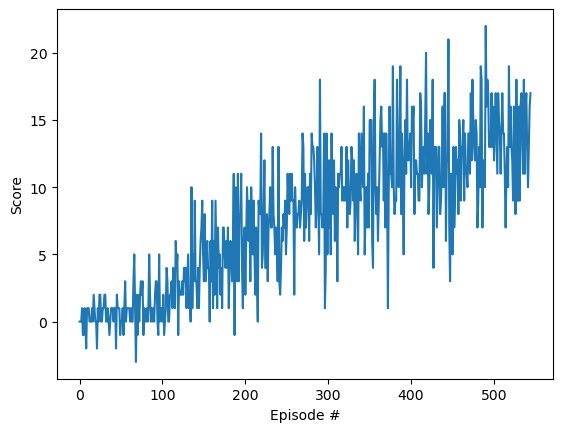
### DQN with PriorizedExerienceReplay :
solved in **266** episodes !<br>
a = 0.6<br>
I use 2 approach with the beta parameter : 
- fix beta = 0.04 (-> solved in 295 episodes)
- increase beta : beta starts with 0.04 and increase slowly to 1 (--> solved in 266 episodes)
  
\begin{align}  
  \text{beta} &= 1 - (1 - \text{beta}) \cdot \exp\left(-\frac{{\text{i_episode}}}{10000}\right)
\end{align}
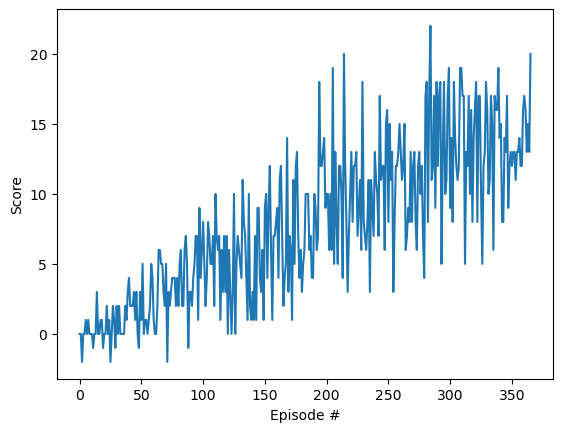

# Conclusion:
We observe PriorizedExperienceReplay enables faster learning.

## For further
I have try to implement Double-Q-learning, but unfortunatly, I didn't observed significative performances.
*(Feel free to let me know if you see improvement with Double-Q-learning)*<br>
The Dual-Q-learning was not evaluate here, it could be interesting to test it in further works.<br>
Another work should be to evaluate same approches with raw pixel input state (see navigtation_pixel.ipynb). In this case, we will have to adapt ours Neural Networks inputs with adding some convolutions.